In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/dataset_manipulated_cl2.csv')

In [3]:
# Define the features for statistics and the target

df_stat = df[['sym_fever',
 'sym_rhinitis',
 'sym_cough',
 'sym_dyspnea',
 'sym_ear-pain',
 'sym_myalgia',
 'sym_arthralgia',
 'sym_sore-throat',
 'sym_conjunctivitis',
 'sym_asthenia',
 'sym_confusion',
 'sym_abdominal-pain',
 'sym_nausea/vomit',
 'sym_diarrhea',
 'sym_lack-appetite',
 'sym_polyadenopathy',
 'sym_skin-rash',
 'sym_pneumonia',
 'sym_other',
 'median_sym_duration',
 'num_symptoms',
 'infection_category',
 'Cluster']]

In [4]:
# Check size of each cluster
df_stat.groupby('Cluster').size()

Cluster
0    378
1    113
2     90
dtype: int64

In [5]:
dict_clusters = {}
cl0 = {}
cl1 = {}
cl2 = {}

n_clusters = 3
for col in df_stat.columns.tolist()[:-1]:
    if (col == 'num_symptoms') or (col == 'median_sym_duration') :
        for i in range(0,n_clusters):
            mean = df_stat[df_stat['Cluster'] == i][col].mean()
            std = df_stat[df_stat['Cluster'] == i][col].std()
            colname = col + ' - Mean (dev.std)' 
            if i == 0:
                cl0[colname] = str(round(mean, 2)) + ' (' + str(round(std, 2)) + ') '
            elif i == 1:
                cl1[colname] = str(round(mean, 2)) + ' (' + str(round(std, 2)) + ') '
            elif i == 2:
                cl2[colname] = str(round(mean, 2)) + ' (' + str(round(std, 2)) + ') '
    else:
        for i in range(0, n_clusters):
            for j in range(len(df_stat[col].unique())):
                list_unique = df_stat[col].unique().tolist()
                num = (df_stat[df_stat['Cluster'] == i][col] == list_unique[j]).sum()
                perc = (df_stat[df_stat['Cluster'] == i][col] == list_unique[j]).sum() / df_stat[df_stat['Cluster'] == i].shape[0] * 100
                colname = col + ' - ' + str(list_unique[j])
                if i == 0:
                    cl0[colname] = str(round(num, 2)) + ' (' + str(round(perc, 2)) + ') '
                elif i == 1:
                    cl1[colname] = str(round(num, 2)) + ' (' + str(round(perc, 2)) + ') '
                elif i == 2:
                    cl2[colname] = str(round(num, 2)) + ' (' + str(round(perc, 2)) + ') '            
           
    dict_clusters['Cluster 0'] = cl0
    dict_clusters['Cluster 1'] = cl1
    dict_clusters['Cluster 2'] = cl2

In [6]:
dfCL_stat = pd.DataFrame.from_dict(dict_clusters, orient='columns')
dfCL_stat.head(50)

,Cluster 0,Cluster 1,Cluster 2
sym_fever - 1,88 (23.28),113 (100.0),80 (88.89)
sym_fever - 0,290 (76.72),0 (0.0),10 (11.11)
sym_rhinitis - 1,66 (17.46),0 (0.0),72 (80.0)
sym_rhinitis - 0,312 (82.54),113 (100.0),18 (20.0)
sym_cough - 0,344 (91.01),113 (100.0),33 (36.67)
sym_cough - 1,34 (8.99),0 (0.0),57 (63.33)
sym_dyspnea - 0,374 (98.94),112 (99.12),88 (97.78)
sym_dyspnea - 1,4 (1.06),1 (0.88),2 (2.22)
sym_ear-pain - 0,378 (100.0),113 (100.0),88 (97.78)
sym_ear-pain - 1,0 (0.0),0 (0.0),2 (2.22)


In [7]:
df_group0 = df_stat[df_stat['Cluster'] == 0]
df_group1 = df_stat[df_stat['Cluster'] == 1]
df_group2 = df_stat[df_stat['Cluster'] == 2]

In [8]:
from scipy.stats import f_oneway

# Conduct the one-way ANOVA:
# If the p-value is less than 0.05 we would reject the null hypothesis. 
# This implies that we have sufficient proof to say that there exists a difference among the three different clusters. 

dfANOVA = pd.DataFrame()
listCols = []
dictFeaturesANOVA = {}
listAnova = []
for column in list(df_stat.columns.tolist()[:-1]):
    ANOVA_value = (f_oneway(df_group0[column], df_group1[column], df_group2[column]))[1]
    listAnova.append(round(ANOVA_value,3))
    if ANOVA_value < 0.05:
        dictFeaturesANOVA[column] = round(ANOVA_value,3)
    listCols.append(column)
dfANOVA['Column'] = listCols
dfANOVA['ANOVA values'] = listAnova

In [9]:
#Symtpoms with ANOVA value less than 0.05
dfANOVA_Features = pd.DataFrame([dictFeaturesANOVA]).T
dfANOVA_Features.rename(columns = {0:'ANOVA values'}, inplace = True)
dfANOVA_Features

,ANOVA values
sym_fever,0.000
sym_rhinitis,0.000
sym_cough,0.000
sym_ear-pain,0.004
sym_myalgia,0.014
sym_arthralgia,0.030
sym_asthenia,0.003
median_sym_duration,0.000
num_symptoms,0.000
infection_category,0.000


In [10]:
dfANOVA

,Column,ANOVA values
0,sym_fever,0.000
1,sym_rhinitis,0.000
2,sym_cough,0.000
3,sym_dyspnea,0.624
4,sym_ear-pain,0.004
5,sym_myalgia,0.014
6,sym_arthralgia,0.030
7,sym_sore-throat,0.054
8,sym_conjunctivitis,0.211
9,sym_asthenia,0.003


In [12]:
cl0 = df[df.loc[:, 'Cluster'] == 0]
cl1 = df[df.loc[:, 'Cluster'] == 1]
cl2 = df[df.loc[:, 'Cluster'] == 2]
dict_sym_cl = {}
for n_sym in list(df['num_symptoms'].unique()):
    numcl0 = cl0[cl0.loc[:, 'num_symptoms'] == n_sym].shape[0] / cl0.shape[0] * 100
    numcl1 = cl1[cl1.loc[:, 'num_symptoms'] == n_sym].shape[0] / cl1.shape[0] * 100
    numcl2 = cl2[cl2.loc[:, 'num_symptoms'] == n_sym].shape[0] / cl2.shape[0] * 100
    dict_sym_cl[n_sym] = {'cl0' : numcl0, 'cl1': numcl1, 'cl2' : numcl2}

In [13]:
df_sym_cl = pd.DataFrame.from_dict(dict_sym_cl, orient='index').sort_index()

<Figure size 6000x3000 with 0 Axes>

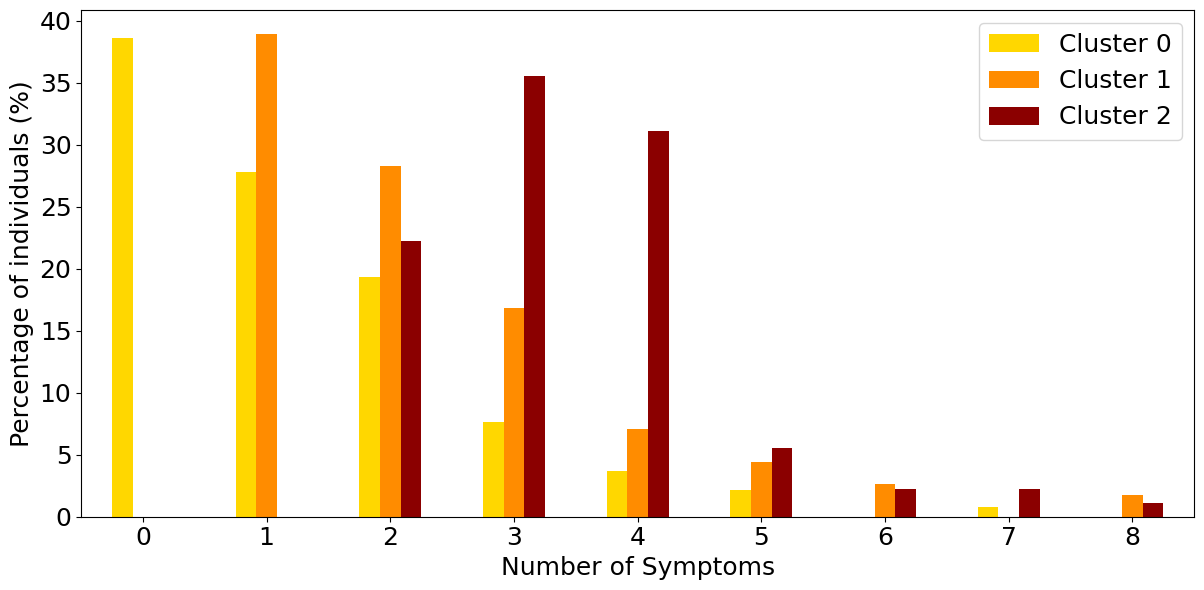

In [ ]:
plt.figure(figsize=(12, 6), dpi = 500)
df_sym_cl.plot( y=["cl0", "cl1", "cl2"], kind="bar", figsize = (12,6), color = ['gold', 'darkorange', 'darkred']) 
plt.xlabel('Number of Symptoms', fontsize = 18)
plt.ylabel('Percentage of individuals (%)', fontsize = 18)
plt.xticks(rotation = 0, fontsize = 18)
plt.xticks(fontsize= 18)
plt.tight_layout() 
plt.yticks(fontsize = 18)
# change names for legend
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], fontsize = 18)
plt.show()